In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
bs = 256

In [5]:
df = pd.read_csv('final.csv')
df.columns = ['image_name', 'tags']
df.head()

,image_name,tags
0,3,drama
1,4,"adventure,drama,fantasy"
2,5,"action,adventure,history"
3,6,"drama,mystery,thriller"
4,7,"action,thriller"


In [6]:
Path.cwd()

PosixPath('/media/kelwa/DEV/Projects/Arabic Movies Poster Multi-lable classification')

In [8]:
np.random.seed(42)
data = (ImageList.from_csv(Path.cwd(), 'final.csv', folder='images', suffix='.jpg')
       .split_by_rand_pct(.2)
       .label_from_df(label_delim=',')
       .transform(get_transforms(), size=(67, 98))
       .databunch().normalize(imagenet_stats))

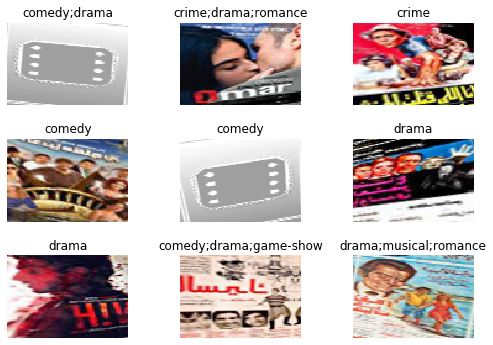

In [9]:
data.show_batch(rows=3, figsize=(7, 5))

In [10]:
# check thresh based on the results
my_acc = partial(accuracy_thresh, thresh=0.2)
learn = cnn_learner(data, models.resnet34, metrics=[my_acc])

In [12]:
data.classes, data.c

(['action',
  'adventure',
  'animation',
  'biography',
  'comedy',
  'crime',
  'documentary',
  'drama',
  'family',
  'fantasy',
  'film-noir',
  'game-show',
  'history',
  'horror',
  'music',
  'musical',
  'mystery',
  'romance',
  'sci-fi',
  'sport',
  'thriller',
  'war',
  'western'],
 23)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


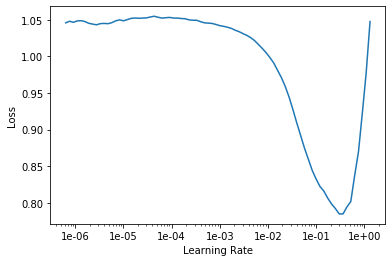

In [14]:
learn.recorder.plot()

In [15]:
lr = 0.01

In [16]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.859549,0.413732,0.394122,00:08
1,0.442361,0.181497,0.907180,00:04
2,0.297168,0.174890,0.921800,00:04
3,0.231849,0.168000,0.918907,00:04
4,0.199318,0.165715,0.925303,00:04


In [17]:
learn.save('stage-1')

In [18]:
test = ImageList.from_folder('test/')
len(test)

2

In [19]:
learn = load_learner('/', test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [20]:
labelled_preds[:5]

NameError: name 'labelled_preds' is not defined